In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt # It will be used to convert date in numbers

In [119]:
df = pd.read_csv('avocado.csv', parse_dates=['Date'])

In [120]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [121]:
df['Date']=df['Date'].map(dt.datetime.toordinal) # change date to number

In [122]:
df = df.drop(['Unnamed: 0', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1)

In [123]:
df.head(2)

,Date,AveragePrice,Total Volume,type,year,region
0,735959,1.33,64236.62,conventional,2015,Albany
1,735952,1.35,54876.98,conventional,2015,Albany


In [124]:
df['type'] = np.where(df['type']=='conventional',1,0) # when 'conventional' = 1 when 'organic' = 0

In [125]:
df.head(2)

,Date,AveragePrice,Total Volume,type,year,region
0,735959,1.33,64236.62,1,2015,Albany
1,735952,1.35,54876.98,1,2015,Albany


In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

In [127]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
categoricals_df = pd.DataFrame(onehot_encoder.fit_transform(df.region.values.reshape(-1,1)))
categoricals_df = categoricals_df.set_index(df.index)
df = pd.concat([df, categoricals_df], axis=1)

In [128]:
df.head(2)

,Date,AveragePrice,Total Volume,type,year,region,0,1,2,3,...,44,45,46,47,48,49,50,51,52,53
0,735959,1.33,64236.62,1,2015,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,735952,1.35,54876.98,1,2015,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
df.columns

Index([        'Date', 'AveragePrice', 'Total Volume',         'type',
               'year',       'region',              0,              1,
                    2,              3,              4,              5,
                    6,              7,              8,              9,
                   10,             11,             12,             13,
                   14,             15,             16,             17,
                   18,             19,             20,             21,
                   22,             23,             24,             25,
                   26,             27,             28,             29,
                   30,             31,             32,             33,
                   34,             35,             36,             37,
                   38,             39,             40,             41,
                   42,             43,             44,             45,
                   46,             47,             48,             49,
      

In [136]:
df = df.iloc[:,:6]

In [138]:
df.head(2)

,Date,AveragePrice,Total Volume,type,year,region
0,735959,1.33,64236.62,1,2015,0
1,735952,1.35,54876.98,1,2015,0


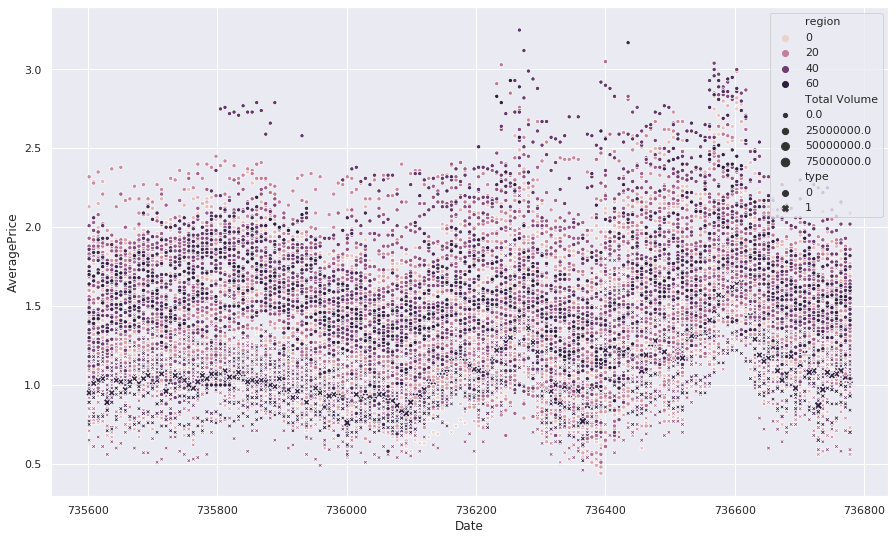

In [139]:
sns.set(rc={'figure.figsize':(15,9)})
sns.scatterplot(x="Date", y='AveragePrice', hue="region", style='type', size='Total Volume', data=df)

In [140]:
X = df.drop(['AveragePrice'], axis=1)
y = df['AveragePrice']

In [141]:
X.head(2)

,Date,Total Volume,type,year,region
0,735959,64236.62,1,2015,0
1,735952,54876.98,1,2015,0


In [142]:
y.head(2)

0    1.33
1    1.35
Name: AveragePrice, dtype: float64

In [147]:
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=30)

In [146]:
# run model and predict linear + decision tree + knn
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
lr_pred = lr_model.predict(X_train)

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr_model = dtr.fit(X_train, y_train)
dtr_pred = dtr_model.predict(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_model = knn.fit(X_train, y_train)
knn_pred = knn_model.predict(X_train)

In [149]:
# check error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
lr_mse = mse(y_train, lr_pred)
dtr_mse = mse(y_train, dtr_pred)
knn_mse = mse(y_train, knn_pred)

# Check RMSE
lr_rmse = np.sqrt(lr_mse)
dtr_rmse = np.sqrt(dtr_mse)
knn_rmse = np.sqrt(knn_mse)

print ("RMSE on Training:\n  Linear Regression: %.2f\n  Decision Tree Regressor: %.2f\n  KNN: %.2f\n" % (lr_rmse, dtr_rmse, knn_rmse))


RMSE on Training:
  Linear Regression: 0.31
  Decision Tree Regressor: 0.00
  KNN: 0.26



In [150]:
# Predict of test models
lr_predt = lr.predict (X_test) # Linear predict
dtr_predt = dtr.predict (X_test) # Decision Tree predict
knn_predt = knn.predict (X_test) # Knn predict

# Check MSE of predicts
lr_mset = mse(y_test, lr_predt)
dtr_mset = mse(y_test, dtr_predt)
knn_mset = mse(y_test, knn_predt)

# Check RMSE
lr_rmset = np.sqrt(lr_mset)
dtr_rmset = np.sqrt(dtr_mset)
knn_rmset = np.sqrt(knn_mset)

print ("RMSE on Test:\n  Linear Regression: %.2f\n  Decision Tree Regressor: %.2f\n  KNN: %.2f\n" % (lr_rmset, dtr_rmset, knn_rmset))

RMSE on Test:
  Linear Regression: 0.30
  Decision Tree Regressor: 0.16
  KNN: 0.33

